In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [47]:
data=pd.read_csv("faults.csv")

In [48]:
data.head(10)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
5,430,441,100250,100337,630,20,87,62357,64,127,...,0.8736,-0.2267,0.9874,1,0,0,0,0,0,0
6,413,446,138468,138883,9052,230,432,1481991,23,199,...,0.9205,0.2791,1.0000,1,0,0,0,0,0,0
7,190,200,210936,210956,132,11,20,20007,124,172,...,0.5000,0.1841,0.3359,1,0,0,0,0,0,0
8,330,343,429227,429253,264,15,26,29748,53,148,...,0.5000,-0.1197,0.5593,1,0,0,0,0,0,0
9,74,90,779144,779308,1506,46,167,180215,53,143,...,0.9024,-0.0651,1.0000,1,0,0,0,0,0,0


In [49]:
label_columns=data.columns.values[-7:]
targets=(data.iloc[:,-7:]==1).idxmax(1)
dataset=data.drop(label_columns,axis=1)
dataset['target']=targets

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
X_Minimum                1941 non-null int64
X_Maximum                1941 non-null int64
Y_Minimum                1941 non-null int64
Y_Maximum                1941 non-null int64
Pixels_Areas             1941 non-null int64
X_Perimeter              1941 non-null int64
Y_Perimeter              1941 non-null int64
Sum_of_Luminosity        1941 non-null int64
Minimum_of_Luminosity    1941 non-null int64
Maximum_of_Luminosity    1941 non-null int64
Length_of_Conveyer       1941 non-null int64
TypeOfSteel_A300         1941 non-null int64
TypeOfSteel_A400         1941 non-null int64
Steel_Plate_Thickness    1941 non-null int64
Edges_Index              1941 non-null float64
Empty_Index              1941 non-null float64
Square_Index             1941 non-null float64
Outside_X_Index          1941 non-null float64
Edges_X_Index            1941 non-null float64
Edges_Y_Index            194

In [51]:
dataset.head(5)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [52]:
dataset.target.value_counts()

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: target, dtype: int64

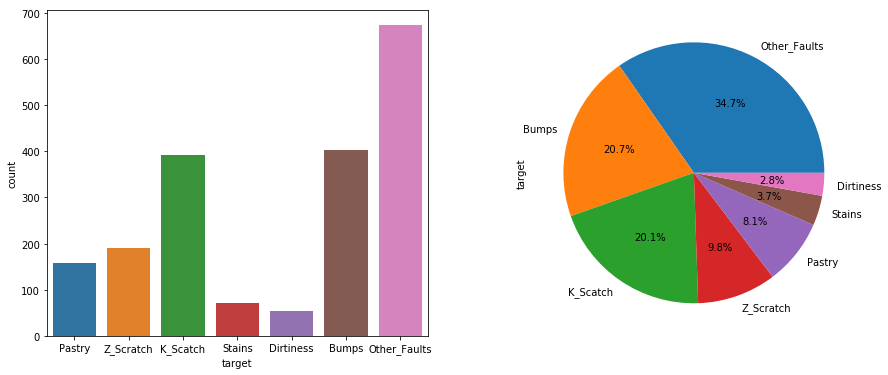

In [53]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='target', data=dataset,ax=ax[0])
dataset['target'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])



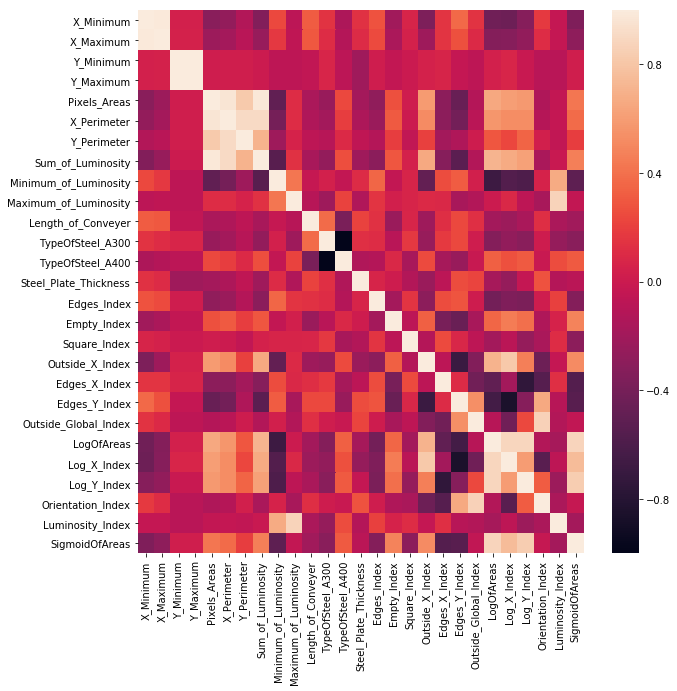

In [54]:
corr=dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [55]:
dataset=dataset.drop('TypeOfSteel_A400',axis=1)
dataset.head(10)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry
5,430,441,100250,100337,630,20,87,62357,64,127,...,0.5500,1.0000,1.0,2.7993,1.0414,1.9395,0.8736,-0.2267,0.9874,Pastry
6,413,446,138468,138883,9052,230,432,1481991,23,199,...,0.1435,0.9607,1.0,3.9567,1.5185,2.6181,0.9205,0.2791,1.0000,Pastry
7,190,200,210936,210956,132,11,20,20007,124,172,...,0.9091,1.0000,1.0,2.1206,1.0000,1.3010,0.5000,0.1841,0.3359,Pastry
8,330,343,429227,429253,264,15,26,29748,53,148,...,0.8667,1.0000,1.0,2.4216,1.1139,1.4150,0.5000,-0.1197,0.5593,Pastry
9,74,90,779144,779308,1506,46,167,180215,53,143,...,0.3478,0.9820,1.0,3.1778,1.2041,2.2148,0.9024,-0.0651,1.0000,Pastry


In [56]:
#split train and test data
x,y=dataset.loc[:,dataset.columns !='target'],dataset.loc[:,'target']
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=42)
trees=np.arange(1,50)


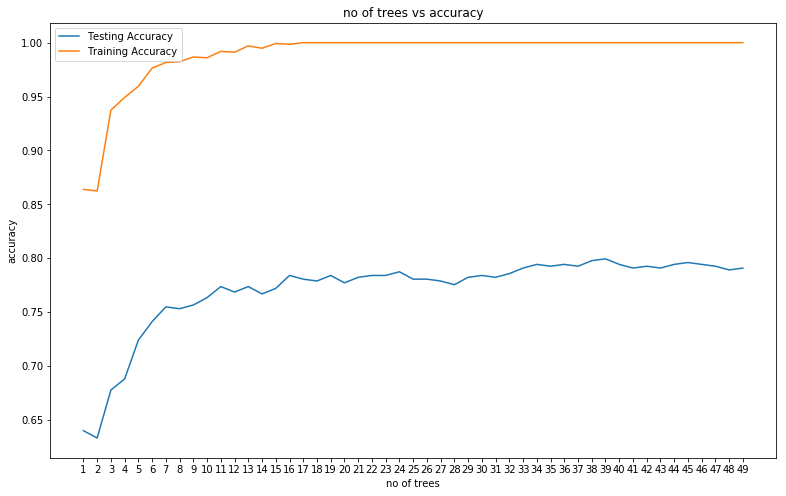

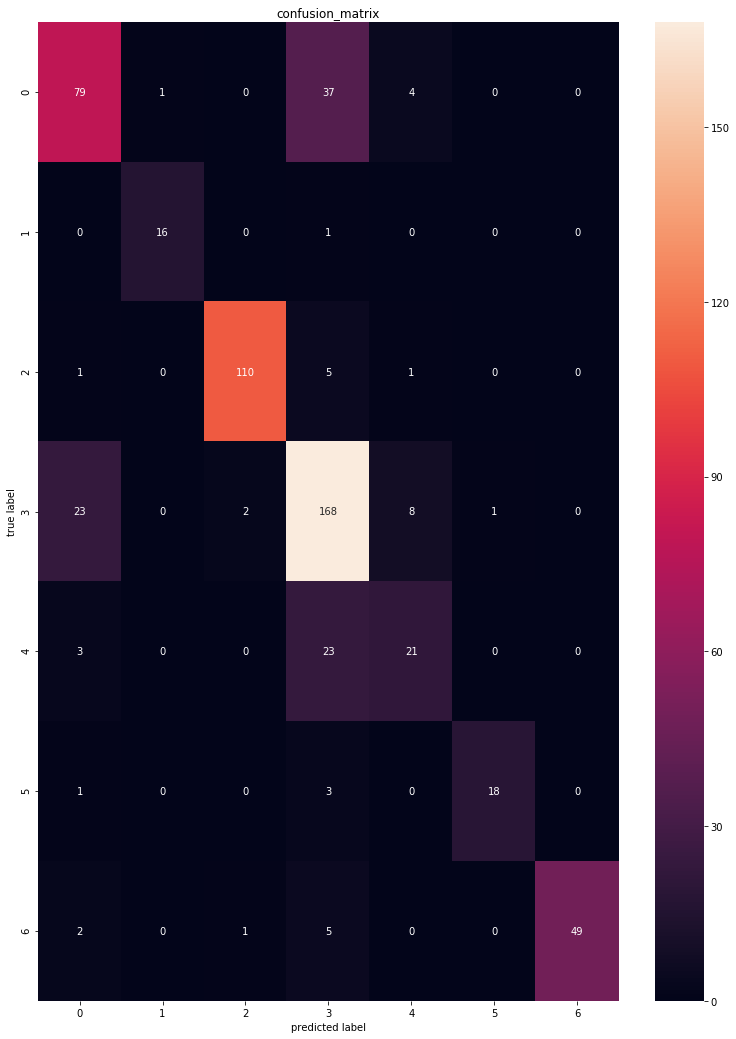

classification report:
               precision    recall  f1-score   support

       Bumps       0.72      0.65      0.69       121
   Dirtiness       0.94      0.94      0.94        17
    K_Scatch       0.97      0.94      0.96       117
Other_Faults       0.69      0.83      0.76       202
      Pastry       0.62      0.45      0.52        47
      Stains       0.95      0.82      0.88        22
   Z_Scratch       1.00      0.86      0.92        57

   micro avg       0.79      0.79      0.79       583
   macro avg       0.84      0.78      0.81       583
weighted avg       0.80      0.79      0.79       583

best accuracy is 0.7993138936535163 with number of trees=39


In [58]:
#randomforest
train_accuracy=[]
test_accuracy=[]
for i,k in enumerate(trees):
    rf=RandomForestClassifier(random_state=8,n_estimators=k,min_samples_split=2)
    rf.fit(x_train,y_train)
    train_accuracy.append(rf.score(x_train,y_train))
    test_accuracy.append(rf.score(x_test,y_test))
#plot
plt.figure(figsize=[13,8])
plt.plot(trees,test_accuracy,label='Testing Accuracy')
plt.plot(trees,train_accuracy,label='Training Accuracy')
plt.legend()
plt.title('no of trees vs accuracy')
plt.xlabel('no of trees')
plt.ylabel('accuracy')
plt.xticks(trees)
plt.show()

rf=RandomForestClassifier(random_state=8,n_estimators=k,min_samples_split=2)
y_pred=rf.fit(x_train,y_train).predict(x_test)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=[13,18])
sns.heatmap(cm,annot=True,fmt='d')
plt.title("confusion_matrix")
plt.ylabel("true label")
plt.xlabel("predicted label")
plt.show()
print("classification report:\n",classification_report(y_test,y_pred))
print("best accuracy is {} with number of trees={}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [ ]:
plt.figure(figsize=(10,10))
plt.title('feature importances')
plt.bar(range(x_train.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(x_train.shape[1]),feat_labels,rotation=90)
plt.xlim([-1,x_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
dataset=dataset.drop('SigmoidOfAreas',axis=1)


In [ ]:
#split train and test data
x,y=dataset.loc[:,dataset.columns !='target'],dataset.loc[:,'target']
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=42)
trees=np.arange(1,50)


In [ ]:
train_accuracy=[]
test_accuracy=[]
for i,k in enumerate(trees):
    rf=RandomForestClassifier(random_state=8,n_estimators=k,min_samples_split=2)
    rf.fit(x_train,y_train)
    train_accuracy.append(rf.score(x_train,y_train))
    test_accuracy.append(rf.score(x_test,y_test))
#plot
plt.figure(figsize=[13,8])
plt.plot(trees,test_accuracy,label='Testing Accuracy')
plt.plot(trees,train_accuracy,label='Training Accuracy')
plt.legend()
plt.title('no of trees vs accuracy')
plt.xlabel('no of trees')
plt.ylabel('accuracy')
plt.xticks(trees)
plt.show()

rf=RandomForestClassifier(random_state=8,n_estimators=k,min_samples_split=2)
y_pred=rf.fit(x_train,y_train).predict(x_test)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=[13,18])
sns.heatmap(cm,annot=True,fmt='d')
plt.title("confusion_matrix")
plt.ylabel("true label")
plt.xlabel("predicted label")
plt.show()
print("classification report:\n",classification_report(y_test,y_pred))
print("best accuracy is {} with number of trees={}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))